<a href="https://colab.research.google.com/github/Destinei1/Destinei1/blob/main/Copy_of_edaStarterCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparatory Code

In [4]:
import pandas as pd #allows us to work with tables of data, data frame
import numpy as np # allows us to work work arrays and matricies, pandas is built ontop numply but not needed
import matplotlib.pyplot as plt #data viz
import seaborn as sns #data viz

In [5]:
from google_drive_downloader import GoogleDriveDownloader
GoogleDriveDownloader.download_file_from_google_drive(file_id="19BYSFEkQgOYLqMlGsY5itcYdBHjqXEP1", dest_path="./Salaries.csv") #this is a public file

In [6]:
df = pd.read_csv('Salaries.csv') #being loaded into a dataframe

Inspection



In [ ]:
df.head(10) #showing the first 10 rows, if empty it will show 5 rows, tail will show you the last 5

In [ ]:
df.sample() #default will give you 1 row but you can pass a number to sample and it will return that many rows
# our last line will be shown in a nice way because collabatory

In [13]:
#get size of the dataset, shape will return a tuple (rows, columns)
df.shape

(401, 8)

In [ ]:
# Info
# shows the number of non null values and the data type of each column
# int64 is a numerical value
# object is a string
# Pandas might not detect the correct datatype
df.info()

In [17]:
# Info the indidiual columsn
df["sex"].dtypes

dtype('O')

CLEANING!!

In [18]:
#removing columns
#  First step is to view the data again
df.head()

,Unnamed: 0,rank,rank num,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,3,B,19,18,Male,139750
1,2,Prof,3,B,20,16,Male,173200
2,3,AsstProf,2,B,4,3,Male,79750
3,4,Prof,3,B,45,39,Male,115000
4,5,Prof,3,B,40,41,Male,141500


In [ ]:
# the unnamed 0 column is just another index
# two arguments, the column we want to review and the axis we want to remove
#  you can also add inpace=true if you want permenant changes to the dataframe
df1 = df.drop("Unnamed: 0", axis="columns")
df1

In [ ]:
# removing rows
# Pandas provides its own index which we can use to remove rows, always starts at zero
# Default is the rows so we dont have to include a second argument
df1.drop([1,2,4])

In [24]:
# Removing Duplicate rows
#  
df1.shape

(401, 7)

In [26]:
df1.duplicated().sum()
#Returns back a series of true or false values
# We can count all the true values by adding the sum 


4

In [27]:
# this function will make changes so we will rename this as a new df
df2 = df1.drop_duplicates()
df2.shape

(397, 7)

In [29]:
# How to remove null values
# First check how many nulls we have
# Sum method will give you back a sum of the null values for each column
df2.isnull().sum()

rank             0
rank num         0
discipline       4
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [35]:
# How to remove rows will null values
# This will create a new dataframe
df3 = df2.dropna()

In [31]:
df2["discipline"][398] = "B"
# This isn't the best way but it gets it done

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
# Changing column names (you can also change the labels for rows)
# Changing rank num to rank number and sex to gender
# you can change multiple colummns by separating the pairs by a comma
df4 = df3.rename(columns={"rank num": "rank number", "sex":"gender"})

In [39]:
#compute descriptive stats
# will return stats for our numerical columns
df4.describe()

,rank number,yrs.since.phd,yrs.service,salary
count,394.000000,394.000000,394.000000,394.000000
mean,2.515228,22.553299,17.774112,113899.898477
std,0.759015,12.835957,12.984714,30328.178769
min,1.000000,1.000000,0.000000,57800.000000
25%,2.000000,12.000000,7.000000,91025.000000
50%,3.000000,21.000000,17.000000,107404.500000
75%,3.000000,32.000000,27.000000,134458.750000
max,3.000000,56.000000,60.000000,231545.000000


In [ ]:
# if we want to include stats for non numerical data
df4.describe(include="all")

In [ ]:
df4["yrs.since.phd"].mean()

In [ ]:
df4["yrs.since.phd"].min()

In [ ]:
df4["yrs.since.phd"].mode()

In [ ]:
df4["yrs.since.phd"].value_counts()

Vizualization

Text(0.5, 1.0, 'Count by Rank')

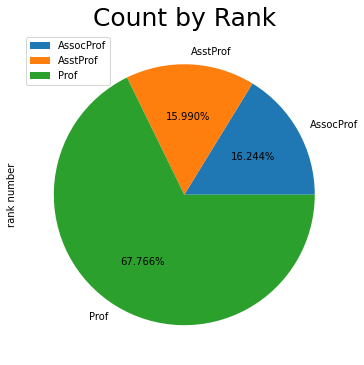

In [63]:
# Pie chart that is the breakdown of teachers, rank column
# plot, type of chart and y axis to include, and datalabels and the size of the chart
# Then include a title, plt is the matplotlib
df4.groupby("rank").count().plot(kind="pie", y="rank number", autopct="%.3f%%", figsize=(6,6))
plt.title("Count by Rank", fontsize= 25)

Text(0.5, 0, 'Years of Service')

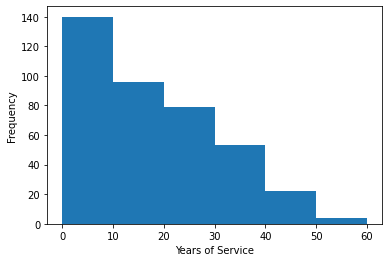

In [70]:
# we want to see a distribution of the professors by years of service
# We will build a histogram, bins is the number divisions not the size of the bin
# It knows to add this label to this chart because the memory has an active figure and its going to add to the current figure we are working with
df4["yrs.service"].plot(kind="hist", bins=6)
plt.xlabel("Years of Service")

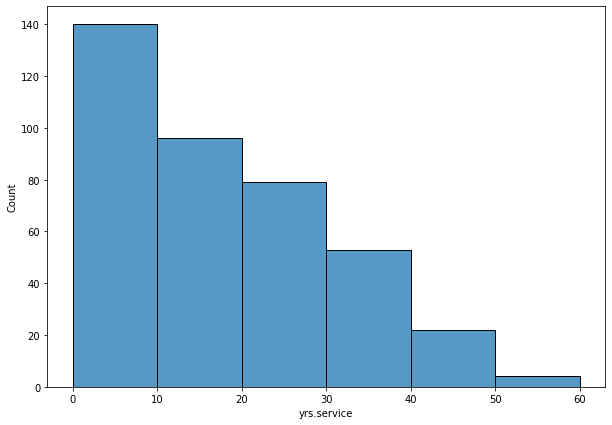

In [75]:
plt.figure(figsize=(10,7))
sns.histplot(x=df4["yrs.service"], bins=6)
# this is the way to view it using the Seaborn package


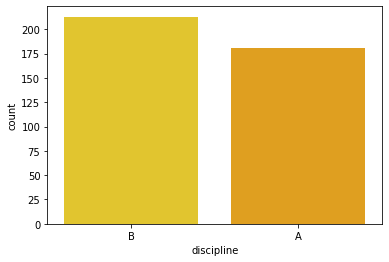

In [77]:
#bar chart breaking down the professors by their discipline
# can also be sns.countplot(x="discipline", data=df4)
# if you give it a palette that doesn't exist, you can spell it wrong and you will be given a list of colors
sns.countplot(x=df4["discipline"], palette="Wistia")


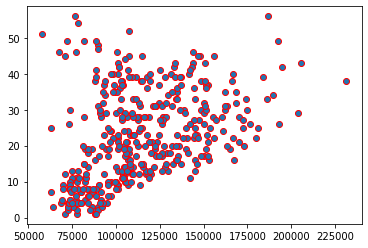

In [83]:
# Scatterplot
# We want to see the relationship between salary and years since PHD


plt.scatter(x="salary", y="yrs.since.phd", data=df4, edgecolors="red")
plt.savefig("scatterplot.pdf")

In [ ]:
df=df.replace(np.nan,"N/a", regex=TRUE)

# to replace all null values with a given string